In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [4]:
dataFrame=pd.read_csv("/home/hrugvedb/Desktop/hrugved/dataset/Telco_customer_churn.csv")
dataFrame


,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [5]:
df=dataFrame.copy()

In [6]:
df

,CustomerID,Count,Country,State,City,ZipCode,LatLong,Latitude,Longitude,Gender,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ChurnLabel,ChurnValue,ChurnScore,CLTV,ChurnReason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [7]:
df.describe()

,Count,ZipCode,Latitude,Longitude,TenureMonths,MonthlyCharges,ChurnValue,ChurnScore,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   Gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   object 
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  TenureMonths      7043 non-null   int64  
 14  PhoneService      7043 non-null   object 
 15  MultipleLines     7043 non-null   object 
 16  InternetService   7043 non-null   object 


In [9]:
df.isnull().sum()

CustomerID             0
Count                  0
Country                0
State                  0
City                   0
ZipCode                0
LatLong                0
Latitude               0
Longitude              0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
TenureMonths           0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
Streaming Movies       0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
ChurnLabel             0
ChurnValue             0
ChurnScore             0
CLTV                   0
ChurnReason         5174
dtype: int64

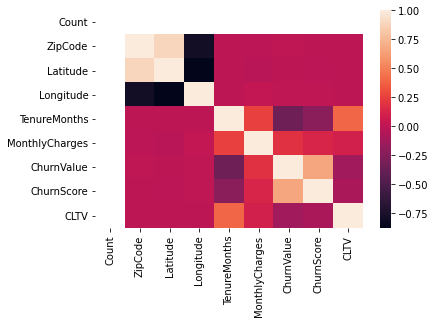

In [10]:
corr=df.corr()
mapp=sns.heatmap(corr)

In [11]:
df.ChurnValue.value_counts()

0    5174
1    1869
Name: ChurnValue, dtype: int64

In [12]:
df.shape

(7043, 33)

In [13]:
columns=df.columns
columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'ZipCode', 'LatLong',
       'Latitude', 'Longitude', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'TenureMonths', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'Streaming Movies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'ChurnLabel', 'ChurnValue', 'ChurnScore', 'CLTV', 'ChurnReason'],
      dtype='object')

In [14]:
binary_cols=[]
for col in columns:
    if df[col].value_counts().shape[0]==2:
        binary_cols.append(col)

In [15]:
binary_cols

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'ChurnLabel',
 'ChurnValue']

array([[<AxesSubplot:title={'center':'Count'}>,
        <AxesSubplot:title={'center':'ZipCode'}>,
        <AxesSubplot:title={'center':'Latitude'}>],
       [<AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'TenureMonths'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'ChurnValue'}>,
        <AxesSubplot:title={'center':'ChurnScore'}>,
        <AxesSubplot:title={'center':'CLTV'}>]], dtype=object)

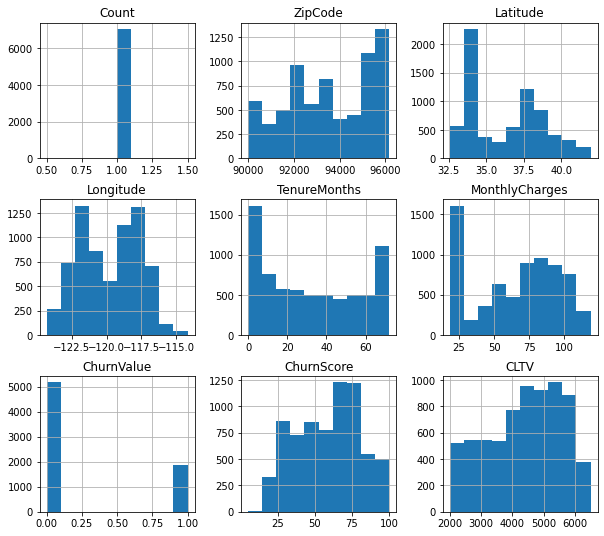

In [16]:
df.hist(figsize=(10,9))

In [17]:
['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'ChurnLabel',
 'ChurnValue']

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'ChurnLabel',
 'ChurnValue']

/home/hrugvedb/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/hrugvedb/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/hrugvedb/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/hrugved

<AxesSubplot:xlabel='ChurnValue', ylabel='count'>

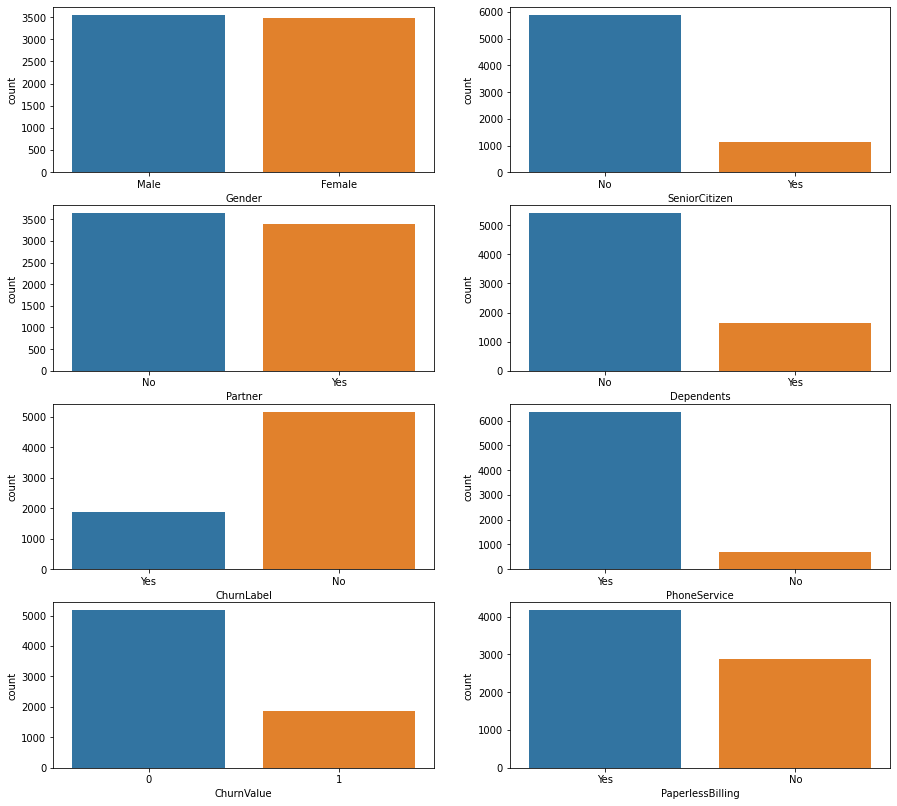

In [18]:
fig,axes=plt.subplots(4,2,figsize=(15,14))
sns.countplot("Gender",data=df,ax=axes[0,0])
sns.countplot("SeniorCitizen",data=df,ax=axes[0,1])
sns.countplot("Partner",data=df,ax=axes[1,0])
sns.countplot("Dependents",data=df,ax=axes[1,1])
sns.countplot("PhoneService",data=df,ax=axes[2,1])
sns.countplot("PaperlessBilling",data=df,ax=axes[3,1])
sns.countplot("ChurnLabel",data=df,ax=axes[2,0])
sns.countplot("ChurnValue",data=df,ax=axes[3,0])

In [19]:
df[['Gender','ChurnValue']].groupby(['Gender']).mean()

,ChurnValue
Gender,
Female,0.269209
Male,0.261603


In [20]:
df[['SeniorCitizen','ChurnValue']].groupby(['SeniorCitizen']).mean()

,ChurnValue
SeniorCitizen,
No,0.236062
Yes,0.416813


In [21]:
binary_cols

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'ChurnLabel',
 'ChurnValue']

In [22]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'ZipCode', 'LatLong',
       'Latitude', 'Longitude', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'TenureMonths', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'Streaming Movies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'ChurnLabel', 'ChurnValue', 'ChurnScore', 'CLTV', 'ChurnReason'],
      dtype='object')

In [23]:
df.columnsbinary_cols

AttributeError: 'DataFrame' object has no attribute 'columnsbinary_cols'

In [24]:
non_binary= [col for col in df.columns if col not in binary_cols]


In [25]:
non_binary

['CustomerID',
 'Count',
 'Country',
 'State',
 'City',
 'ZipCode',
 'LatLong',
 'Latitude',
 'Longitude',
 'TenureMonths',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'Streaming Movies',
 'Contract',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'ChurnScore',
 'CLTV',
 'ChurnReason']

In [26]:
non_binary_cols = [col for col in df.columns if col not in binary_cols]
non_binary_df = df[non_binary_cols]


In [27]:
non_binary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Count             7043 non-null   int64  
 2   Country           7043 non-null   object 
 3   State             7043 non-null   object 
 4   City              7043 non-null   object 
 5   ZipCode           7043 non-null   int64  
 6   LatLong           7043 non-null   object 
 7   Latitude          7043 non-null   float64
 8   Longitude         7043 non-null   float64
 9   TenureMonths      7043 non-null   int64  
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null   object 


/home/hrugvedb/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Country', ylabel='count'>

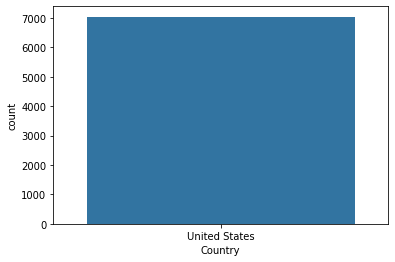

In [28]:
sns.countplot("Country",data=df)

/home/hrugvedb/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='City', ylabel='count'>

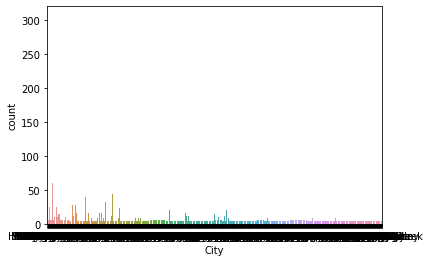

In [29]:
sns.countplot("City",data=df)

In [30]:
df['City'].value_counts().sum

<bound method Series.sum of Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Dinuba             4
Folsom             4
Bass Lake          4
Lucerne            4
Sierraville        4
Name: City, Length: 1129, dtype: int64>

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

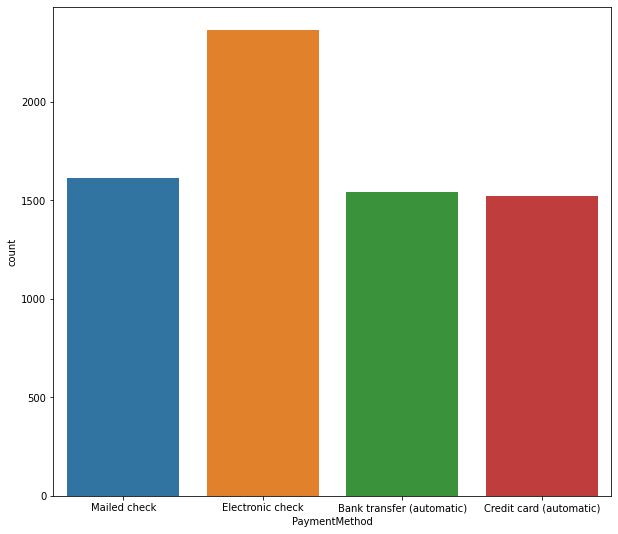

In [31]:
plt.figure(figsize=(10,9))
sns.countplot(x="PaymentMethod", data=df)


<AxesSubplot:xlabel='InternetService', ylabel='count'>

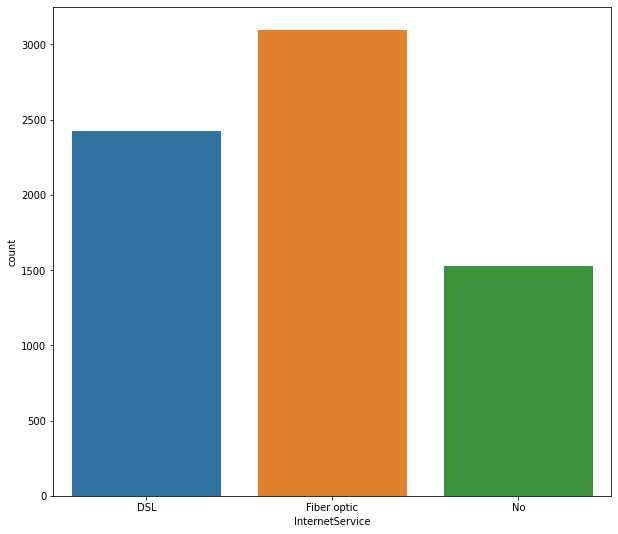

In [32]:
plt.figure(figsize=(10,9))
sns.countplot(x="InternetService", data=df)


In [33]:
tripp_cols=[]
for col in columns:
    if df[col].value_counts().shape[0]==3:
        tripp_cols.append(col)

In [34]:
 tripp_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'Streaming Movies',
 'Contract']

/home/hrugvedb/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/hrugvedb/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/hrugvedb/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/hrugved

<AxesSubplot:xlabel='Contract', ylabel='count'>

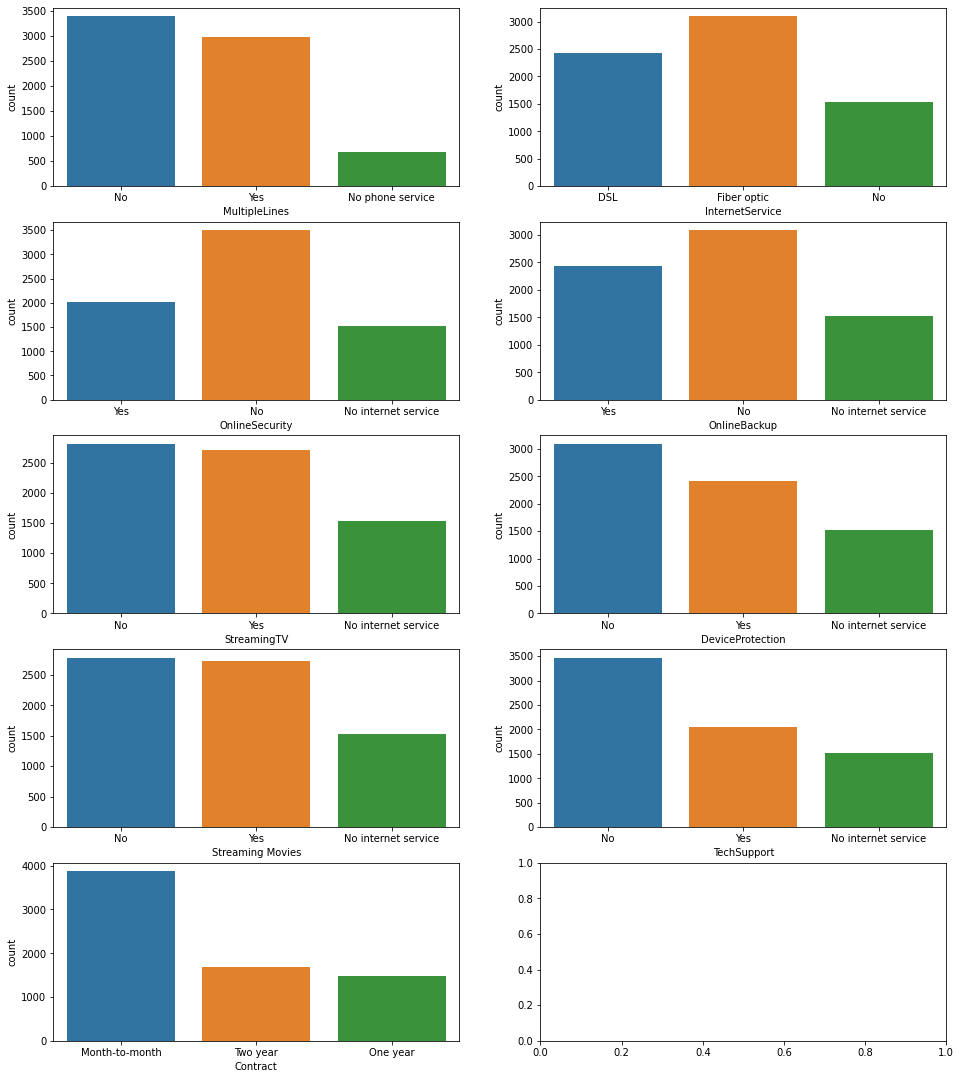

In [35]:
fig,axes=plt.subplots(5,2,figsize=(16,19))
sns.countplot("MultipleLines",data=df,ax=axes[0,0])
sns.countplot("InternetService",data=df,ax=axes[0,1])
sns.countplot("OnlineSecurity",data=df,ax=axes[1,0])
sns.countplot("OnlineBackup",data=df,ax=axes[1,1])
sns.countplot("DeviceProtection",data=df,ax=axes[2,1])
sns.countplot("TechSupport",data=df,ax=axes[3,1])
sns.countplot("StreamingTV",data=df,ax=axes[2,0])
sns.countplot("Streaming Movies",data=df,ax=axes[3,0])
sns.countplot("Contract",data=df,ax=axes[4,0])

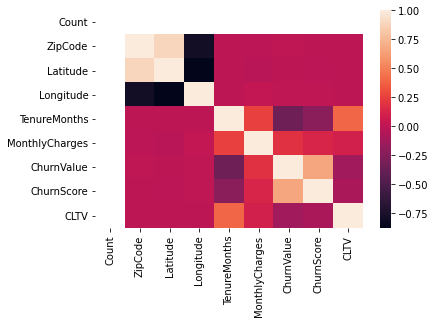

In [36]:

mapp=sns.heatmap(corr)

In [35]:
binary_cols

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'ChurnLabel',
 'ChurnValue']

In [37]:
tripp_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'Streaming Movies',
 'Contract']

In [38]:
quat_cols=[]
for col in columns:
    if df[col].value_counts().shape[0]==4:
        quat_cols.append(col)

In [39]:
quat_cols

['PaymentMethod']

In [40]:
five_cols=[]
for col in columns:
    if df[col].value_counts().shape[0]==7:
        five_cols.append(col)

In [41]:
five_cols

[]

In [42]:
df2=df.copy()

In [43]:
df = pd.get_dummies(df, columns=['Contract'])
print(df)

      CustomerID  Count        Country       State          City  ZipCode  \
0     3668-QPYBK      1  United States  California   Los Angeles    90003   
1     9237-HQITU      1  United States  California   Los Angeles    90005   
2     9305-CDSKC      1  United States  California   Los Angeles    90006   
3     7892-POOKP      1  United States  California   Los Angeles    90010   
4     0280-XJGEX      1  United States  California   Los Angeles    90015   
...          ...    ...            ...         ...           ...      ...   
7038  2569-WGERO      1  United States  California       Landers    92285   
7039  6840-RESVB      1  United States  California      Adelanto    92301   
7040  2234-XADUH      1  United States  California         Amboy    92304   
7041  4801-JZAZL      1  United States  California  Angelus Oaks    92305   
7042  3186-AJIEK      1  United States  California  Apple Valley    92308   

                     LatLong   Latitude   Longitude  Gender  ...  \
0     3

In [44]:
df.describe()

,Count,ZipCode,Latitude,Longitude,TenureMonths,MonthlyCharges,ChurnValue,ChurnScore,CLTV,Contract_Month-to-month,Contract_One year,Contract_Two year
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755,0.550192,0.209144,0.240664
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152,0.497510,0.406726,0.427517
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000,0.000000,0.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000,0.000000,0.000000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000,1.000000,0.000000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000,1.000000,0.000000,0.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000,1.000000,1.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               7043 non-null   object 
 1   Count                    7043 non-null   int64  
 2   Country                  7043 non-null   object 
 3   State                    7043 non-null   object 
 4   City                     7043 non-null   object 
 5   ZipCode                  7043 non-null   int64  
 6   LatLong                  7043 non-null   object 
 7   Latitude                 7043 non-null   float64
 8   Longitude                7043 non-null   float64
 9   Gender                   7043 non-null   object 
 10  SeniorCitizen            7043 non-null   object 
 11  Partner                  7043 non-null   object 
 12  Dependents               7043 non-null   object 
 13  TenureMonths             7043 non-null   int64  
 14  PhoneService            

In [46]:
df.drop(['CustomerID','State',],axis=1,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Count                    7043 non-null   int64  
 1   Country                  7043 non-null   object 
 2   City                     7043 non-null   object 
 3   ZipCode                  7043 non-null   int64  
 4   LatLong                  7043 non-null   object 
 5   Latitude                 7043 non-null   float64
 6   Longitude                7043 non-null   float64
 7   Gender                   7043 non-null   object 
 8   SeniorCitizen            7043 non-null   object 
 9   Partner                  7043 non-null   object 
 10  Dependents               7043 non-null   object 
 11  TenureMonths             7043 non-null   int64  
 12  PhoneService             7043 non-null   object 
 13  MultipleLines            7043 non-null   object 
 14  InternetService         

In [48]:
df.drop(['ChurnLabel'],axis=1,inplace=True)

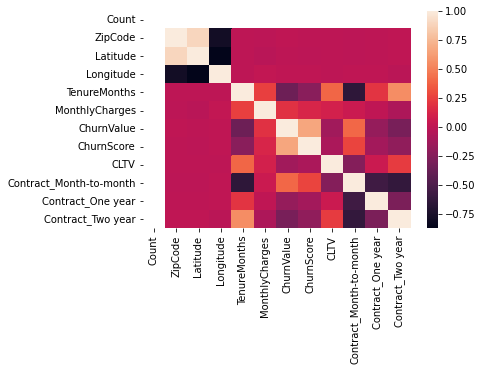

In [49]:
corr=df.corr()
mapp=sns.heatmap(corr)

In [50]:
# Convert 'Yes' to 1 and 'No' to 0
df['SeniorCitizen'] = df['SeniorCitizen'].map({'Yes': 1, 'No': 0})


In [51]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [52]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

In [53]:
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

In [54]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Count                    7043 non-null   int64  
 1   Country                  7043 non-null   object 
 2   City                     7043 non-null   object 
 3   ZipCode                  7043 non-null   int64  
 4   LatLong                  7043 non-null   object 
 5   Latitude                 7043 non-null   float64
 6   Longitude                7043 non-null   float64
 7   Gender                   7043 non-null   object 
 8   SeniorCitizen            7043 non-null   int64  
 9   Partner                  7043 non-null   int64  
 10  Dependents               7043 non-null   int64  
 11  TenureMonths             7043 non-null   int64  
 12  PhoneService             7043 non-null   int64  
 13  MultipleLines            7043 non-null   object 
 14  InternetService         

In [56]:
df.drop(['LatLong'],axis=1,inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Count                    7043 non-null   int64  
 1   Country                  7043 non-null   object 
 2   City                     7043 non-null   object 
 3   ZipCode                  7043 non-null   int64  
 4   Latitude                 7043 non-null   float64
 5   Longitude                7043 non-null   float64
 6   Gender                   7043 non-null   object 
 7   SeniorCitizen            7043 non-null   int64  
 8   Partner                  7043 non-null   int64  
 9   Dependents               7043 non-null   int64  
 10  TenureMonths             7043 non-null   int64  
 11  PhoneService             7043 non-null   int64  
 12  MultipleLines            7043 non-null   object 
 13  InternetService          7043 non-null   object 
 14  OnlineSecurity          

In [58]:
df['ChurnReason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: ChurnReason, d

<AxesSubplot:xlabel='ChurnReason', ylabel='count'>

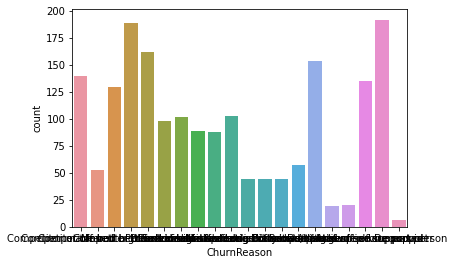

In [59]:
import seaborn as sns

sns.countplot(x='ChurnReason', data=df)



In [60]:
df.fillna(np.nan)


,Count,Country,City,ZipCode,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,...,PaymentMethod,MonthlyCharges,TotalCharges,ChurnValue,ChurnScore,CLTV,ChurnReason,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,United States,Los Angeles,90003,33.964131,-118.272783,Male,0,0,0,...,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer,1,0,0
1,1,United States,Los Angeles,90005,34.059281,-118.307420,Female,0,0,1,...,Electronic check,70.70,151.65,1,67,2701,Moved,1,0,0
2,1,United States,Los Angeles,90006,34.048013,-118.293953,Female,0,0,1,...,Electronic check,99.65,820.5,1,86,5372,Moved,1,0,0
3,1,United States,Los Angeles,90010,34.062125,-118.315709,Female,0,1,1,...,Electronic check,104.80,3046.05,1,84,5003,Moved,1,0,0
4,1,United States,Los Angeles,90015,34.039224,-118.266293,Male,0,0,1,...,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,United States,Landers,92285,34.341737,-116.539416,Female,0,0,0,...,Bank transfer (automatic),21.15,1419.4,0,45,5306,NaN,0,0,1
7039,1,United States,Adelanto,92301,34.667815,-117.536183,Male,0,1,1,...,Mailed check,84.80,1990.5,0,59,2140,NaN,0,1,0
7040,1,United States,Amboy,92304,34.559882,-115.637164,Female,0,1,1,...,Credit card (automatic),103.20,7362.9,0,71,5560,NaN,0,1,0
7041,1,United States,Angelus Oaks,92305,34.167800,-116.864330,Female,0,1,1,...,Electronic check,29.60,346.45,0,59,2793,NaN,1,0,0


In [61]:
df['ChurnReason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: ChurnReason, d

In [62]:
df['ChurnReason'].isnull().sum()

5174

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Count                    7043 non-null   int64  
 1   Country                  7043 non-null   object 
 2   City                     7043 non-null   object 
 3   ZipCode                  7043 non-null   int64  
 4   Latitude                 7043 non-null   float64
 5   Longitude                7043 non-null   float64
 6   Gender                   7043 non-null   object 
 7   SeniorCitizen            7043 non-null   int64  
 8   Partner                  7043 non-null   int64  
 9   Dependents               7043 non-null   int64  
 10  TenureMonths             7043 non-null   int64  
 11  PhoneService             7043 non-null   int64  
 12  MultipleLines            7043 non-null   object 
 13  InternetService          7043 non-null   object 
 14  OnlineSecurity          

In [64]:
df.drop(['ChurnReason'],axis=1,inplace=True)

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit the encoder to the categorical column
le.fit(df['City'])

# Transform the categorical column
df['City'] = le.transform(df['City'])

In [66]:
df['City']

0       562
1       562
2       562
3       562
4       562
       ... 
7038    521
7039      2
7040     22
7041     26
7042     32
Name: City, Length: 7043, dtype: int64

In [67]:
le.fit(df['TotalCharges'])

# Transform the categorical column
df['TotalCharges'] = le.transform(df['TotalCharges'])

In [69]:
df.drop(['Longitude'],axis=1,inplace=True) 


In [70]:
df['Latitude']

KeyError: 'Latitude'

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Count                    7043 non-null   int64  
 1   Country                  7043 non-null   object 
 2   City                     7043 non-null   int64  
 3   ZipCode                  7043 non-null   int64  
 4   Gender                   7043 non-null   object 
 5   SeniorCitizen            7043 non-null   int64  
 6   Partner                  7043 non-null   int64  
 7   Dependents               7043 non-null   int64  
 8   TenureMonths             7043 non-null   int64  
 9   PhoneService             7043 non-null   int64  
 10  MultipleLines            7043 non-null   object 
 11  InternetService          7043 non-null   object 
 12  OnlineSecurity           7043 non-null   object 
 13  OnlineBackup             7043 non-null   object 
 14  DeviceProtection        

In [72]:
df['MonthlyCharges']*1000

0        53850.0
1        70700.0
2        99650.0
3       104800.0
4       103700.0
          ...   
7038     21150.0
7039     84800.0
7040    103200.0
7041     29600.0
7042    105650.0
Name: MonthlyCharges, Length: 7043, dtype: float64

In [73]:
df['MonthlyCharges']=df['MonthlyCharges'].astype(int)

In [74]:
tripp_cols


['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'Streaming Movies',
 'Contract']

In [75]:
le.fit(df['PaymentMethod'])

# Transform the categorical column
df['PaymentMethod'] = le.transform(df['PaymentMethod'])

In [76]:
le.fit(df['PaperlessBilling'])

# Transform the categorical column
df['PaperlessBilling'] = le.transform(df['PaperlessBilling'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Count                    7043 non-null   int64 
 1   Country                  7043 non-null   object
 2   City                     7043 non-null   int64 
 3   ZipCode                  7043 non-null   int64 
 4   Gender                   7043 non-null   object
 5   SeniorCitizen            7043 non-null   int64 
 6   Partner                  7043 non-null   int64 
 7   Dependents               7043 non-null   int64 
 8   TenureMonths             7043 non-null   int64 
 9   PhoneService             7043 non-null   int64 
 10  MultipleLines            7043 non-null   object
 11  InternetService          7043 non-null   object
 12  OnlineSecurity           7043 non-null   object
 13  OnlineBackup             7043 non-null   object
 14  DeviceProtection         7043 non-null  

In [78]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})


In [80]:
tripp_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'Streaming Movies',
 'Contract']

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Count                    7043 non-null   int64 
 1   Country                  7043 non-null   object
 2   City                     7043 non-null   int64 
 3   ZipCode                  7043 non-null   int64 
 4   Gender                   7043 non-null   int64 
 5   SeniorCitizen            7043 non-null   int64 
 6   Partner                  7043 non-null   int64 
 7   Dependents               7043 non-null   int64 
 8   TenureMonths             7043 non-null   int64 
 9   PhoneService             7043 non-null   int64 
 10  MultipleLines            7043 non-null   object
 11  InternetService          7043 non-null   object
 12  OnlineSecurity           7043 non-null   object
 13  OnlineBackup             7043 non-null   object
 14  DeviceProtection         7043 non-null  

In [87]:
df = pd.get_dummies(df, columns=['TechSupport'])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Count                                 7043 non-null   int64
 1   City                                  7043 non-null   int64
 2   ZipCode                               7043 non-null   int64
 3   Gender                                7043 non-null   int64
 4   SeniorCitizen                         7043 non-null   int64
 5   Partner                               7043 non-null   int64
 6   Dependents                            7043 non-null   int64
 7   TenureMonths                          7043 non-null   int64
 8   PhoneService                          7043 non-null   int64
 9   PaperlessBilling                      7043 non-null   int64
 10  PaymentMethod                         7043 non-null   int64
 11  MonthlyCharges                        7043 

In [91]:
df.drop(['Country'],axis=1,inplace=True)

KeyError: "['Country'] not found in axis"

In [92]:
y=df['ChurnValue']
X=df.drop(['ChurnValue'],axis=1)
X_train , X_test ,y_train,y_test=train_test_split(X,y,test_size=.35,random_state=42)

In [93]:
rfc=RandomForestClassifier(n_estimators=11,random_state=42)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [94]:
accu=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)

In [257]:
print(f"Accuracy:{accu:.2f}")
print("\nthe classification report:\n",classification_rep)

Accuracy:0.92

the classification report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      1789
           1       0.87      0.83      0.85       677

    accuracy                           0.92      2466
   macro avg       0.90      0.89      0.90      2466
weighted avg       0.92      0.92      0.92      2466

